In [ ]:
%pip install pycaret
%pip install shap

     |████████████████████████████████| 256kB 2.9MB/s 
     |████████████████████████████████| 6.8MB 7.8MB/s 
     |████████████████████████████████| 13.9MB 31.7MB/s 
     |████████████████████████████████| 266kB 41.4MB/s 
     |████████████████████████████████| 266kB 43.4MB/s 
     |████████████████████████████████| 66.1MB 54kB/s 
     |████████████████████████████████| 174kB 41.6MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 1.8MB 29.4MB/s 
     |████████████████████████████████| 1.6MB 31.5MB/s 
     |████████████████████████████████| 153kB 47.5MB/s 
     |████████████████████████████████| 163kB 46.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 327kB 45.1MB/s 
     |████████████████████████████████| 1.1MB 32.6MB/s 
     |████████████████████████████████| 6.0MB 34.6MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 


     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456468 sha256=35f8ed6b97d7caeb49d919c3a9d008a9177c85d5e863977e61995d9e54244c93
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.regression import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

In [ ]:
df = df[df.days_to_donation >= 0]
df = df[df.days_to_donation < df.days_to_donation.quantile(.97)]
df.shape

(10465, 41)

In [ ]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after', 'first_cont_order','first_order_dt','order_dt','first_cont_dt','tot_contribution_paid_amt','Lifetime Giving'], axis=1)
df.head()

,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,prospect_board,days_to_donation,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
50,7132,0.297910,1,4,0.37865,0,1880,0.100180,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
51,7132,0.000000,1,4,0.37865,0,1880,0.113355,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
52,7132,-0.720197,1,4,0.37865,0,1880,0.113355,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
53,7132,0.416722,1,4,0.37865,0,1880,0.379081,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
54,7132,0.443393,1,4,0.37865,0,1880,0.495472,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1


In [ ]:
setup(
    df, 
    target = 'days_to_donation',
    train_size = 0.8,
    verbose = True,
    numeric_features = [
        'geo_area_desc',
        'Prelim Capacity'
    ]
)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5464
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(10465, 34)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  ...  facility_desc_Small venue_1
 50        7132.0  ...                          0.0
 51        7132.0  ...                          0.0
 52        7132.0  ...                          0.0
 53        7132.0  ...                          0.0
 54        7132.0  ...                          1.0
 ...          ...  ...                          ...
 70364  2418931.0  ...                          0.0
 70365  2418999.0  ...                          0.0
 70366  2418999.0  ...                          0.0
 70367  2419011.0  ...                          0.0
 70369  2419248.0  ...                          0.0
 
 [10465 rows x 60 columns], 50       1880.0
 51       1880.0
 52       1880.0
 53       1880.0
 54       1880.0
           ...  
 70364     741.0
 70365       0.0
 70366       0.0
 70367       0.0
 70369     812.0
 Name: days_to_donation, Length: 10465, dtype: float64,         owner_no  ...  facility_desc_Small venue_1
 38797  2375231.0  ...                          0.0
 

In [ ]:
model = compare_models(verbose=True, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,187.4762,145779.5187,381.3375,0.7451,1.8308,2.2357,0.0533
1,Decision Tree,190.2367,222093.8513,470.5141,0.6127,1.8129,1.7664,0.0864
2,Random Forest,205.8622,112301.3688,334.8102,0.8041,1.9237,2.8770,4.0801
3,Extra Trees Regressor,256.8188,163672.9450,404.3048,0.7145,1.9705,3.7954,3.6142
4,CatBoost Regressor,325.1335,186404.0977,431.5423,0.6747,2.1597,4.4285,5.5831
5,Light Gradient Boosting Machine,351.5252,212467.0234,460.9011,0.6294,2.2253,5.3436,0.1970
6,Gradient Boosting Regressor,483.8337,354721.7982,595.5357,0.3814,2.3798,7.1082,1.6802
7,Extreme Gradient Boosting,484.1753,354874.3029,595.6617,0.3811,2.3773,7.0770,0.9263
8,Random Sample Consensus,586.3354,539944.4438,734.7398,0.0585,2.4913,8.6898,1.5853
9,AdaBoost Regressor,593.0813,479733.5421,692.5294,0.1637,2.6021,10.7809,0.4365


In [ ]:
model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,99.9032,55756.5527,236.1283,0.9051,1.7369,4.5504
1,105.7246,61449.8167,247.8907,0.8960,1.8595,1.3698
2,102.3602,64349.4195,253.6719,0.8884,1.8100,2.6394
3,96.6320,53160.0366,230.5646,0.9066,1.7018,2.9538
4,92.2483,52030.9324,228.1029,0.9045,1.6611,1.0168
5,99.2539,60397.3984,245.7588,0.8970,1.6795,2.3053
6,104.1174,59243.0007,243.3989,0.8995,1.7408,0.7794
7,102.4271,65203.6251,255.3500,0.8779,1.7874,1.7095
8,91.0382,49516.8443,222.5238,0.9120,1.7256,0.5872
9,107.7850,58896.7243,242.6865,0.9012,1.8537,2.3331


In [ ]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,95.3519,51870.4036,227.7507,0.9087,1.7938,1.9752


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,delivery_desc_Digital_0,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,days_to_donation,Label
0,2396885.0,0.243553,7.0,4.0,0.120687,0.050436,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,516.0,401.1461
1,2372442.0,0.100851,1.0,5.0,0.398880,0.562572,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1309.0,863.8079
2,2384175.0,0.311623,1.0,3.0,0.181172,0.260339,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,64.0,105.0660
3,2333998.0,0.433679,1.0,3.0,0.477661,0.441809,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,332.0,335.3060
4,2378310.0,0.497637,5.0,5.0,0.365935,0.455315,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,115.0,126.5926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2371739.0,0.256508,1.0,5.0,0.181993,0.148513,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,309.0,484.0803
2089,2281498.0,0.272975,4.0,3.0,0.303770,0.176647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1196.0,1196.1821
2090,2206978.0,0.367194,1.0,5.0,0.252806,0.163583,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,594.0,611.2241
2091,2172025.0,-0.720197,1.0,3.0,0.115005,-0.831507,0.0,

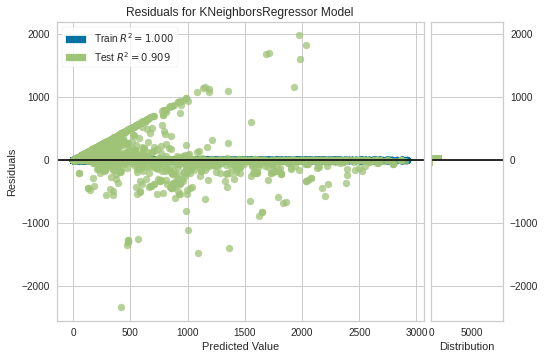

In [ ]:
plot_model(model, plot='residuals', save=True, verbose=True)

In [ ]:
plot_model(model, plot='feature', save=True, verbose=True)

SystemExit: ignored

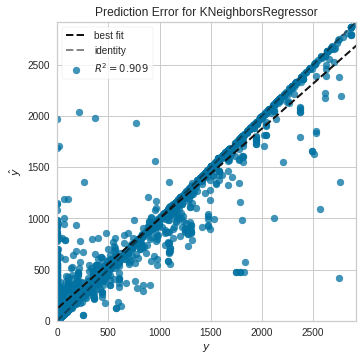

In [ ]:
plot_model(model, plot='error', save=True, verbose=True)

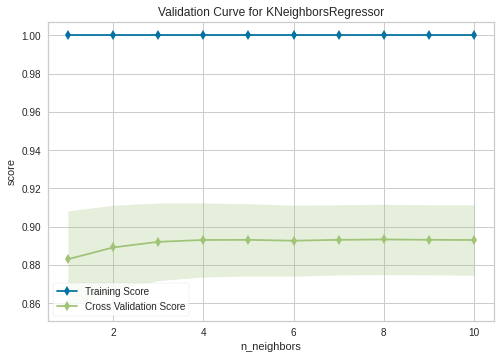

In [20]:
plot_model(model, plot='vc', save=True, verbose=True)

In [23]:
plot_model(model, plot='parameter', save=True, verbose=True)

,Parameters
algorithm,brute
leaf_size,60
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,50
p,2
weights,distance


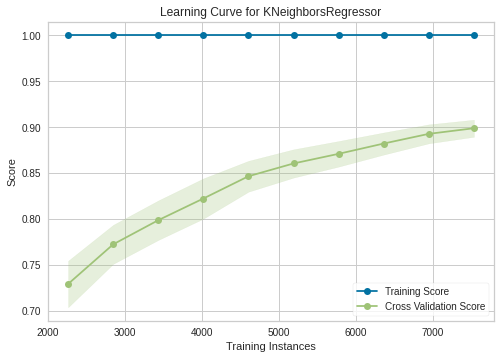

In [22]:
plot_model(model, plot='learning', verbose=True, save=True)

In [ ]:
save_model(model, 'PyCaret on Target 3', verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [ ]:
model2 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,215.6015,125961.6573,354.9108,0.7856,1.8922,3.7112
1,215.8792,129178.5875,359.4142,0.7815,2.0516,2.9151
2,208.2909,121139.9270,348.0516,0.7900,1.9515,2.7211
3,206.7127,109341.3632,330.6681,0.8079,1.9067,4.6396
4,204.3767,112408.2225,335.2734,0.7936,1.8128,2.1080
5,204.7725,107303.2035,327.5717,0.8169,1.8024,3.4461
6,196.1689,101807.9664,319.0736,0.8273,1.9399,1.5608
7,207.6072,111908.2421,334.5269,0.7905,1.9506,2.9632
8,192.2010,98721.1140,314.1992,0.8245,1.9200,1.1955
9,207.0113,105243.4049,324.4124,0.8234,2.0088,3.5099


In [ ]:
model2 = tune_model(model2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,240.1697,140791.9307,375.2225,0.7603,1.9748,4.4012
1,235.5024,139596.2885,373.6259,0.7639,2.1148,3.3484
2,230.2192,132773.9637,364.3816,0.7698,2.0197,3.0169
3,225.6259,119547.1322,345.7559,0.7900,1.9839,4.7456
4,229.6400,122502.9994,350.0043,0.7751,1.8942,2.5721
5,227.1281,119848.1219,346.1909,0.7955,1.8793,3.9578
6,220.0930,113572.8512,337.0057,0.8074,2.0294,1.8297
7,230.8857,125268.4126,353.9328,0.7655,2.0190,3.1890
8,210.8295,108338.0179,329.1474,0.8074,2.0133,1.5113
9,217.9302,108944.1748,330.0669,0.8172,2.0308,3.7535


In [ ]:
predict_model(model2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,215.1472,115559.2609,339.9401,0.7965,1.9938,2.6188


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,delivery_desc_Digital_0,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,days_to_donation,Label
0,2396885.0,0.243553,7.0,4.0,0.120687,0.050436,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,516.0,302.5714
1,2372442.0,0.100851,1.0,5.0,0.398880,0.562572,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1309.0,1273.3929
2,2384175.0,0.311623,1.0,3.0,0.181172,0.260339,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,64.0,329.2857
3,2333998.0,0.433679,1.0,3.0,0.477661,0.441809,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,332.0,346.7786
4,2378310.0,0.497637,5.0,5.0,0.365935,0.455315,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,115.0,222.6643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2371739.0,0.256508,1.0,5.0,0.181993,0.148513,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,309.0,597.7571
2089,2281498.0,0.272975,4.0,3.0,0.303770,0.176647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1196.0,1273.8429
2090,2206978.0,0.367194,1.0,5.0,0.252806,0.163583,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,594.0,1006.6714
2091,2172025.0,-0.720197,1.0,3.0,0.115005,-0.831507,0.